In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PIL import Image
import os
import pandas as pd
from scipy.integrate import trapz

In [4]:
all_data=pd.DataFrame({'freq':[ 0., 0.390625,  0.78125,   1.171875,  1.5625,    1.953125,  2.34375,
  2.734375,  3.125,     3.515625,  3.90625,   4.296875,  4.6875,    5.078125,
  5.46875,   5.859375,  6.25,      6.640625,  7.03125,   7.421875,  7.8125,
  8.203125,  8.59375,   8.984375,  9.375,     9.765625, 10.15625,  10.546875,
 10.9375,   11.328125, 11.71875,  12.109375, 12.5,      12.890625, 13.28125,
 13.671875, 14.0625,   14.453125, 14.84375,  15.234375, 15.625,    16.015625,
 16.40625,  16.796875, 17.1875,   17.578125, 17.96875,  18.359375, 18.75,
 19.140625, 19.53125,  19.921875, 20.3125,   20.703125, 21.09375,  21.484375,
 21.875,    22.265625, 22.65625,  23.046875, 23.4375,   23.828125, 24.21875,
 24.609375, 25.,       25.390625, 25.78125,  26.171875, 26.5625,   26.953125,
 27.34375,  27.734375, 28.125,    28.515625, 28.90625,  29.296875, 29.6875,
 30.078125, 30.46875,  30.859375, 31.25,     31.640625, 32.03125,  32.421875,
 32.8125,   33.203125, 33.59375,  33.984375, 34.375,    34.765625, 35.15625,
 35.546875, 35.9375,   36.328125, 36.71875,  37.109375, 37.5,      37.890625,
 38.28125,  38.671875, 39.0625,   39.453125, 39.84375,  40.234375, 40.625,
 41.015625, 41.40625,  41.796875, 42.1875,   42.578125, 42.96875,  43.359375,
 43.75,     44.140625, 44.53125,  44.921875, 45.3125,   45.703125, 46.09375,
 46.484375, 46.875,    47.265625, 47.65625,  48.046875, 48.4375,   48.828125,
 49.21875,  49.609375, 50.      ]})
print(all_data)

          freq
0     0.000000
1     0.390625
2     0.781250
3     1.171875
4     1.562500
..         ...
124  48.437500
125  48.828125
126  49.218750
127  49.609375
128  50.000000

[129 rows x 1 columns]


In [17]:
#  Create the "PSD_figures Scalograms" & "PSD_data Scalograms" directory if it doesn't exist

if not os.path.exists("PSD_figures Scalograms"):
    os.makedirs("PSD_figures Scalograms")
    
if not os.path.exists("PSD_data Scalograms"):
    os.makedirs("PSD_data Scalograms")

In [15]:
# @title Performing PSD Analysis

grps = {
        'Age': ['12 wks', '24 wks'],
        'Sex': ['Male', 'Female'],
        'Diet': ['HFD', 'NC'],
        'SexDiet': ['MaleNC', 'FemaleNC', 'MaleHFD', 'FemaleHFD'],
        'AgeDiet': ['24 wksNC', '24 wksHFD', '12 wksNC', '12 wksHFD'],
        'SexAge': ['Male12 wks', 'Male24 wks', 'Female12 wks', 'Female24 wks'],
        'SexAgeDiet': ['Male24 wksNC', 'Male24 wksHFD', 'Male12 wksNC', 'Male12 wksHFD',
                       'Female24 wksNC', 'Female24 wksHFD', 'Female12 wksNC', 'Female12 wksHFD']
       }

fs = 100  # Define the sampling frequency and other parameters outside the loop
nperseg = 256
noverlap = 128

for grp, col in grps.items():  # Use items() to iterate through dictionary keys and values
#     all_data = pd.DataFrame()  # Initialize an empty DataFrame for each group
    print(grp)

    for g in col:
        print(g)
        
        # Load scalogram image and convert to numpy array
        path_scal = f'Scalograms2/freq_100_({grp})/scal-cropped/{g}'

        for file in os.listdir(path_scal):
            img_path = os.path.join(path_scal, file)
            
            # Load the scalogram data
            scal_img = plt.imread(img_path)
            scal_data = np.mean(scal_img, axis=-1)

            # Calculate the power spectral density using Welch's method
            f, psd = signal.welch(scal_data, fs=fs, nperseg=nperseg, noverlap=noverlap)
            
            # Calculate the average power spectral density across all segments
            psd_avg = np.mean(psd, axis=0)

            data = pd.DataFrame({'freq': f, 'psd': psd_avg})
            all_data = pd.concat([all_data, data['psd']], axis=1)
            
#             # Plot the power spectral density
#             plt.clf()
#             plt.semilogy(f, psd_avg)
#             plt.xlabel('Frequency (Hz)')
#             plt.ylabel('PSD (mmHg^2/Hz)')
#             main = f'PSD_figures Scalograms/freq_100_({grp})/Images/{g}'
#             if not os.path.exists(main):
#                 os.makedirs(main)
#             plt.savefig(f'PSD_figures Scalograms/freq_100_({grp})/Images/{g}/{file}.png')

        all_data.to_excel(f'PSD_data Scalograms/PSD_all scalograms_{grp}_{g}.xlsx')  # Save data for each group
            
        
print("Processing completed.")


Age
12 wks
24 wks
Processing completed.


In [5]:
# @title Calculating AUC from the previously generated Excel sheets

grps = {
        'Age': ['12 wks', '24 wks'],
        'Sex': ['Male', 'Female'],
        'Diet': ['HFD', 'NC'],
        'SexDiet': ['MaleNC', 'FemaleNC', 'MaleHFD', 'FemaleHFD'],
        'AgeDiet': ['24 wksNC', '24 wksHFD', '12 wksNC', '12 wksHFD'],
        'SexAge': ['Male12 wks', 'Male24 wks', 'Female12 wks', 'Female24 wks'],
        'SexAgeDiet': ['Male24 wksNC', 'Male24 wksHFD', 'Male12 wksNC', 'Male12 wksHFD',
                       'Female24 wksNC', 'Female24 wksHFD', 'Female12 wksNC', 'Female12 wksHFD']
       }

all_data_analysis= pd.DataFrame()

for grp in grps:
    print(grp)
    col = grps[grp]
    for g in col:
        print(g)
        all_data = pd.read_excel(f'PSD_data Scalograms/PSD_all scalograms_{grp}_{g}.xlsx')

        for column in all_data.columns:
            if column != 'freq':

                start_freq_47 = 42.578125  # Starting frequency
                end_freq_47 = 47.65625  # Ending frequency

                # Find the indices corresponding to the specified frequency range
                start_index_47 = np.where(all_data['freq'] >= start_freq_47)[0][0]
                end_index_47 = np.where(all_data['freq'] <= end_freq_47)[0][-1]

                # Extract the frequency and PSD values within the specified range
                freq_range_47 = all_data['freq'].iloc[start_index_47:end_index_47 + 1]
                psd_range_47 = all_data[column].iloc[start_index_47:end_index_47 + 1]

                # Calculate the area under the curve using the trapezoidal rule
                area_47 = trapz(psd_range_47, x=freq_range_47)


                analysis = pd.DataFrame({'area 47': area_47}, index=[0])

                all_data_analysis = pd.concat([all_data_analysis, analysis], axis=0)
                all_data_analysis.to_excel(f'PSD_data Scalograms/PSD AUC_all scalogrms_{grp}_{g}.xlsx')
        all_data_analysis= pd.DataFrame()
        

SexDiet
MaleNC
FemaleNC
MaleHFD
FemaleHFD


In [29]:
# # @title Performing PSD Analysis and calculating AUC

# grps = {
#         'Age': ['12 wks', '24 wks'],
# #         'Sex': ['Male', 'Female'],
# #         'Diet': ['HFD', 'NC'],
# #         'SexDiet': ['MaleNC', 'FemaleNC', 'MaleHFD', 'FemaleHFD'],
# #         'AgeDiet': ['24 wksNC', '24 wksHFD', '12 wksNC', '12 wksHFD'],
# #         'SexAge': ['Male12 wks', 'Male24 wks', 'Female12 wks', 'Female24 wks'],
# #         'SexAgeDiet': ['Male24 wksNC', 'Male24 wksHFD', 'Male12 wksNC', 'Male12 wksHFD',
# #                        'Female24 wksNC', 'Female24 wksHFD', 'Female12 wksNC', 'Female12 wksHFD']
#        }

# all_data_analysis= pd.DataFrame()


# for grp in grps:
#     print(grp)
#     col = grps[grp]
#     for g in col:
#         print(g)
#     # Load scalogram image and convert to numpy array
#         path_scal= f'Scalograms2/freq_100_({grp})/scal-cropped/{g}'

#         for file in os.listdir(path_scal):
#             img_path = os.path.join(path_scal, file)

#             # Load the scalogram data
#             scal_img = plt.imread(img_path)  # replace 'scalogram.png' with your own file name
#             scal_data = np.mean(scal_img, axis=-1)

#             # Define the parameters for the scalogram
#             fs = 100  # sampling frequency in Hz

#             nperseg = 256  # number of samples per segment: default for plt.scalgram()

#             noverlap = 128  # number of overlapping samples between segments

#             # Calculate the power spectral density using Welch's method
#             f, psd = signal.welch(scal_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

#             # Calculate the average power spectral density across all segments
#             psd_avg = np.mean(psd, axis=0)

#             start_freq_47 = 42.578125  # Starting frequency
#             end_freq_47 = 47.65625  # Ending frequency

#             # Find the indices corresponding to the specified frequency range
#             start_index_47 = np.where(f >= start_freq_47)[0][0]
#             end_index_47 = np.where(f <= end_freq_47)[0][-1]

#             # Extract the frequency and PSD values within the specified range
#             freq_range_47 = f[start_index_47:end_index_47 + 1]
#             psd_range_47 = psd_avg[start_index_47:end_index_47 + 1]

#             # Calculate the area under the curve using the trapezoidal rule
#             area_47 = trapz(psd_range_47, x=freq_range_47)

#             analysis = pd.DataFrame({'area 47': area_47}, index=[0])

#             all_data_analysis += analysis
#             all_data_analysis.to_excel(f'PSD_data Scalograms/PSD_all scalograms_{grp}_{g}.xlsx')
#             break

Age
12 wks
24 wks


Age
12 wks
24 wks
Sex
Male
Female
Diet
HFD
NC
SexDiet
MaleNC
FemaleNC
MaleHFD
FemaleHFD
AgeDiet
24 wksNC
24 wksHFD
12 wksNC
12 wksHFD
SexAge
Male12 wks
Male24 wks
Female12 wks
Female24 wks
SexAgeDiet
Male24 wksNC
Male24 wksHFD
Male12 wksNC
Male12 wksHFD
Female24 wksNC
Female24 wksHFD
Female12 wksNC
Female12 wksHFD


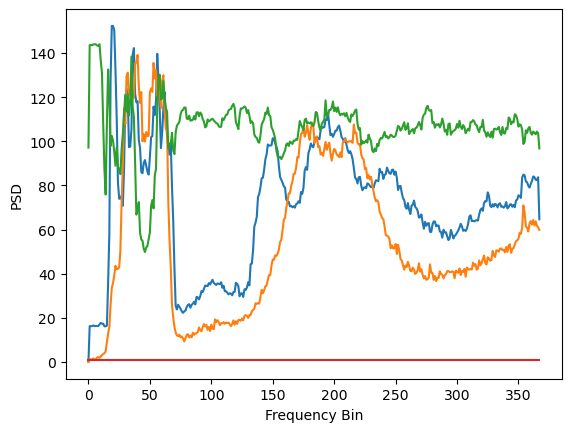

In [31]:
# @title Calculating PSD of scalograms using the Magnitude Squared of scalograms values

grps = {
        'Age': ['12 wks', '24 wks'],
        'Sex': ['Male', 'Female'],
        'Diet': ['HFD', 'NC'],
        'SexDiet': ['MaleNC', 'FemaleNC', 'MaleHFD', 'FemaleHFD'],
        'AgeDiet': ['24 wksNC', '24 wksHFD', '12 wksNC', '12 wksHFD'],
        'SexAge': ['Male12 wks', 'Male24 wks', 'Female12 wks', 'Female24 wks'],
        'SexAgeDiet': ['Male24 wksNC', 'Male24 wksHFD', 'Male12 wksNC', 'Male12 wksHFD',
                       'Female24 wksNC', 'Female24 wksHFD', 'Female12 wksNC', 'Female12 wksHFD']
       }

for grp in grps:
    print(grp)
    col = grps[grp]
    for g in col:
        print(g)
        # Load spectrogram image and convert to numpy array
        path_scal= f'Scalograms2/freq_100_({grp})/scal-cropped/{g}'

        for file in os.listdir(path_scal):
            img_path = os.path.join(path_scal, file)

            scalogram_img = Image.open(img_path)
            scalogram_data = np.array(scalogram_img)

            # Compute magnitude squared of scalogram values
            scal_mag_squared = np.abs(scalogram_data)**2

            # Compute mean PSD across time axis
            psd = np.mean(scal_mag_squared, axis=1)
            psd_avg = np.mean(psd, axis=0)

            # Plot the power spectral density
            freq_bins = np.arange(len(psd))
            plt.clf()
            plt.plot(freq_bins, psd)
            plt.xlabel('Frequency Bin')
            plt.ylabel('PSD')
            plt.savefig(f'PSD_figures Scalograms/{file}.png')
            break

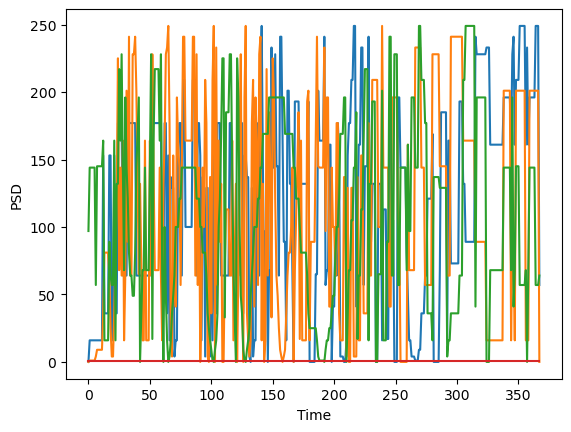

In [33]:
# Load spectrogram image
img = Image.open('Scalograms2/freq_100_(SexAgeDiet)/scal-cropped/Male24 wksNC/Male24 wksNC0039.png')

# Convert image to 2D array of magnitudes
mag = np.asarray(img)

# Determine frequency resolution
fs = 100  # Sampling rate of original signal
win_length = 256  # Length of window used to compute spectrogram
freq_res = fs / win_length

# Find index of frequency bin for 100 Hz
freq = 2  # Frequency of interest
freq_bin = int(2 / freq_res)

# Extract column of magnitudes for frequency bin
freq_mag = mag[:, freq_bin]

# Compute PSD of signal at 1000 Hz
psd = np.square(freq_mag)

# Plot PSD as a function of time
plt.plot(psd)
plt.xlabel('Time')
plt.ylabel('PSD')
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 4, using nperseg = 4
  warnings.warn('nperseg = {0:d} is greater than input length '


ValueError: ignored

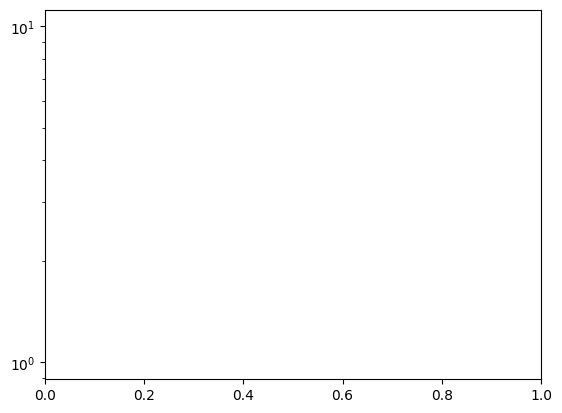

In [ ]:
# Load spectrogram image
#img = Image.open('/content/Freq_100_Spectrograms/freq_100_(Age)/spect-cropped/12 wks/12 wks0001.png')

# Convert image to 2D array of magnitudes
#mag = np.asarray(img)

#f, psd = signal.welch(mag, fs=100, nperseg=256)

# Plot the PSD
#plt.semilogy(f, psd)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('PSD')
#plt.show()